**Project Title: Health Diagnosis Prediction with Machine Learning**

**Summary:**

In the "Health Diagnosis Prediction with Machine Learning" project, I set out to develop a predictive model capable of diagnosing health conditions based on various medical indicators. The dataset I utilized contained essential health parameters such as age, gender, blood pressure, cholesterol levels, and more.

**Steps Taken:**

1. **Data Importing and Exploration:** I began by importing the dataset using the Pandas library and delved into its structure and features to gain insights.

2. **Data Preprocessing:** I undertook several preprocessing tasks, including handling missing values, encoding categorical variables, and scaling numerical features, to prepare the data for modeling.

3. **Feature Selection:** I identified relevant features and split the data into predictor variables (features) and the target variable (health condition).

4. **Model Building:** I experimented with a range of machine learning algorithms, including Logistic Regression, Gradient Boosting Classifier, Linear Discriminant Analysis, K-Nearest Neighbors, Decision Tree Classifier, Gaussian Naive Bayes, Random Forest Classifier, and Support Vector Classifier. Each model's performance was evaluated using cross-validation techniques.

5. **Hyperparameter Tuning:** For the Gradient Boosting Classifier model, I conducted hyperparameter tuning using GridSearchCV to optimize its performance.

6. **Model Evaluation:** I evaluated the performance of the selected Gradient Boosting Classifier model on the test data using various metrics such as accuracy score, confusion matrix, and classification report.

7. **Final Prediction:** Finally, I utilized the trained Gradient Boosting Classifier model to make predictions for sample data, illustrating its practical utility in health diagnosis prediction.

**Findings:**

Through my analysis, I discovered that the Gradient Boosting Classifier model demonstrated promising performance in diagnosing health conditions based on the provided medical features. Following hyperparameter tuning, the model exhibited improved accuracy, underscoring the significance of parameter optimization in machine learning model development.

Overall, this project underscores the potential of machine learning techniques in healthcare for precise health diagnosis, facilitating early intervention and treatment planning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('heart_data.csv')
df.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [8]:
df.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

In [9]:
df.dtypes

rest_bp              int64
chest_pain           int64
thalassemia          int64
age                  int64
fasting_bs           int64
max_hr               int64
exercise_angina      int64
gender               int64
st_slope             int64
cholesterol          int64
st_depression      float64
rest_ecg             int64
num_vessels          int64
diagnosis            int64
dtype: object

In [10]:
# List of columns with numeric data
numeric_features = ['age', 'rest_bp', 'cholesterol', 'max_hr', 'st_depression', 'diagnosis']

# List of columns with categorical data
cat_features = ['gender', 'chest_pain', 'fasting_bs', 'rest_ecg', 'exercise_angina', 'st_slope', 'num_vessels', 'thalassemia']

# Print the lists of features
print("Numeric features:", numeric_features)
print("Categorical features:", cat_features)

Numeric features: ['age', 'rest_bp', 'cholesterol', 'max_hr', 'st_depression', 'diagnosis']
Categorical features: ['gender', 'chest_pain', 'fasting_bs', 'rest_ecg', 'exercise_angina', 'st_slope', 'num_vessels', 'thalassemia']


In [11]:
df[cat_features] = df[cat_features].astype(object)

df.dtypes

rest_bp              int64
chest_pain          object
thalassemia         object
age                  int64
fasting_bs          object
max_hr               int64
exercise_angina     object
gender              object
st_slope            object
cholesterol          int64
st_depression      float64
rest_ecg            object
num_vessels         object
diagnosis            int64
dtype: object

## categorical data analysis

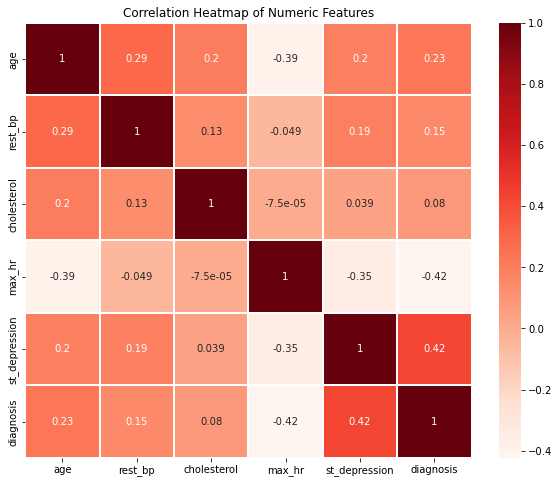

In [12]:
numeric_df = df[numeric_features]

# Calculate the correlation between selected columns
corr_data = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

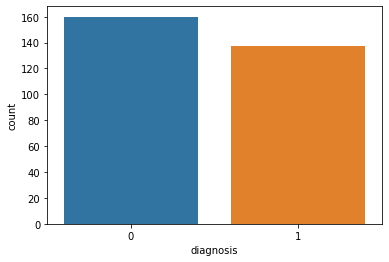

In [13]:
condition_ax = sns.countplot(x='diagnosis', data=df)

plt.show()

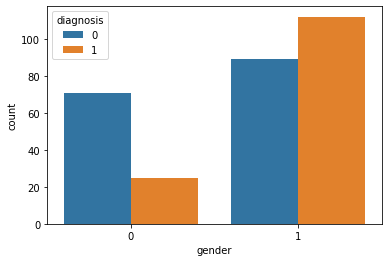

In [14]:
sex_ax = sns.countplot(x='gender', hue='diagnosis', data=df)
plt.show()

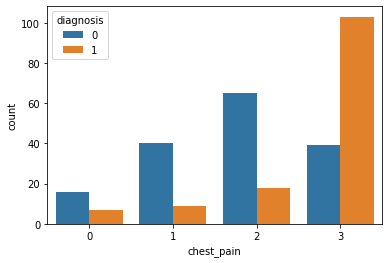

In [16]:
cp_ax = sns.countplot(x='chest_pain', hue='diagnosis', data=df)

plt.show()

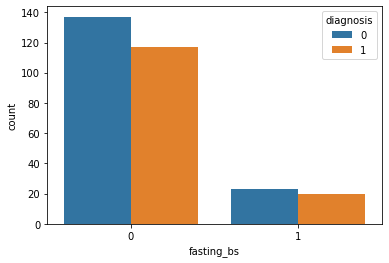

In [17]:
fbs_ax = sns.countplot(x='fasting_bs', hue='diagnosis', data=df)
plt.show()

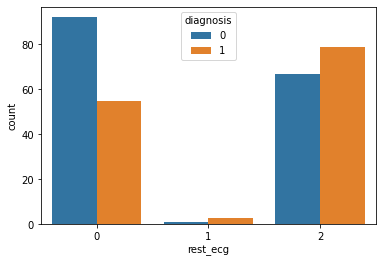

In [18]:
restecg_ax = sns.countplot(x='rest_ecg', hue='diagnosis', data=df)

plt.show()

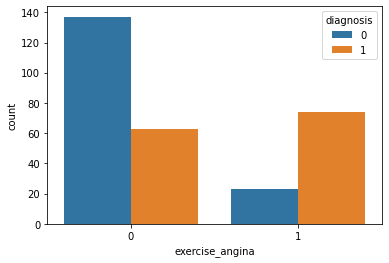

In [19]:
exang_ax = sns.countplot(x='exercise_angina', hue='diagnosis', data=df)
plt.show()

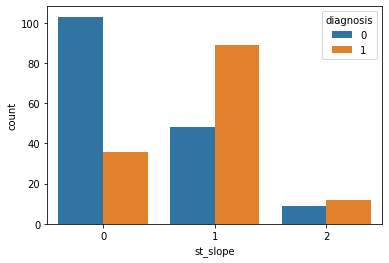

In [20]:
slope_ax = sns.countplot(x='st_slope', hue='diagnosis', data=df)
plt.show()

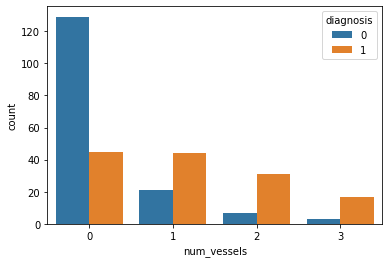

In [21]:
ca_ax = sns.countplot(x='num_vessels', hue='diagnosis', data=df)

plt.show()

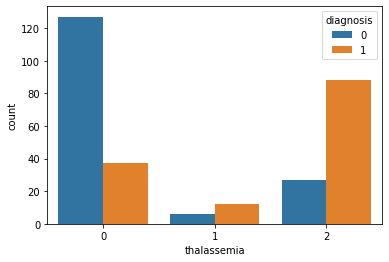

In [22]:
thal_ax = sns.countplot(x='thalassemia', hue='diagnosis', data=df)

plt.show()

## Numerical data Analysis

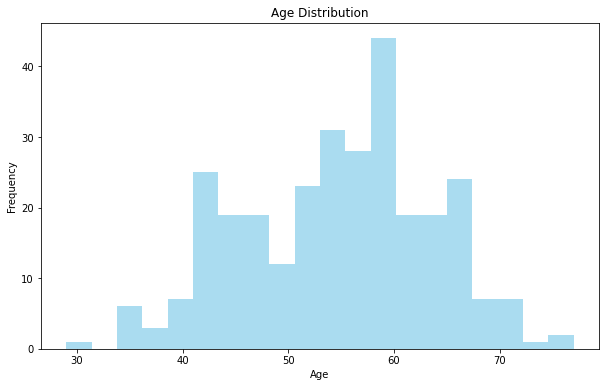

In [23]:
age_col = df['age']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'age' column
plt.hist(age_col, bins=20, color='skyblue', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

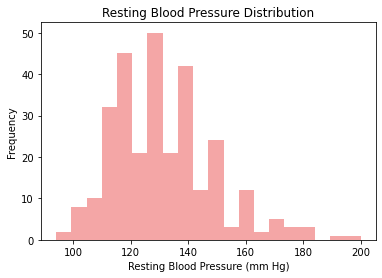

In [24]:
trestbps_col = df['rest_bp']

plt.hist(trestbps_col, bins=20, color='lightcoral', alpha=0.7)

plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.title('Resting Blood Pressure Distribution')
plt.show()


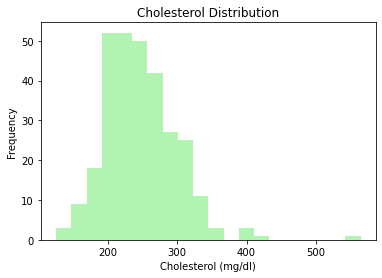

In [25]:
chol_col = df['cholesterol']
plt.hist(chol_col, bins=20, color='lightgreen', alpha=0.7)

plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution')
plt.show()

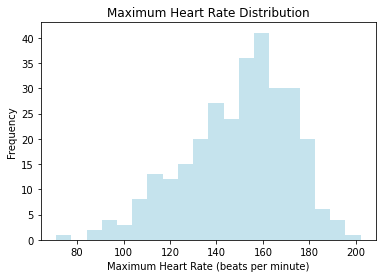

In [26]:
thalach_col = df['max_hr']
plt.hist(thalach_col, bins=20, color='lightblue', alpha=0.7)

plt.xlabel('Maximum Heart Rate (beats per minute)')
plt.ylabel('Frequency')
plt.title('Maximum Heart Rate Distribution')
plt.show()

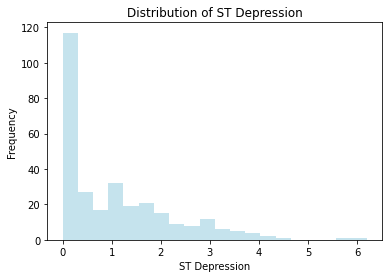

In [27]:
oldpeak_col = df['st_depression']

plt.hist(oldpeak_col, bins=20, color='lightblue', alpha=0.7)
plt.xlabel('ST Depression')
plt.ylabel('Frequency')
plt.title('Distribution of ST Depression')
plt.show()

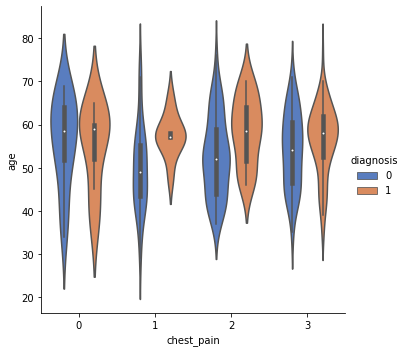

In [28]:
violinplt = sns.catplot(x='chest_pain', y='age', hue='diagnosis', kind='violin', data=df, palette='muted')

plt.show()

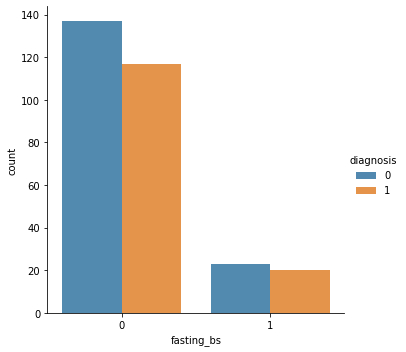

In [29]:
countplt = sns.catplot(x='fasting_bs', hue='diagnosis', kind='count', data=df, alpha=0.85)

plt.show()

## Encoding Categorical Features

In [30]:
categorical_cols = ['chest_pain', 'thalassemia', 'st_slope']

# Iterate through the categorical columns and cast each column to integer data type
for col in categorical_cols:
    df[col] = df[col].astype(int)

# Perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_', dtype=int)

df_encoded.dtypes

rest_bp              int64
age                  int64
fasting_bs          object
max_hr               int64
exercise_angina     object
gender              object
cholesterol          int64
st_depression      float64
rest_ecg            object
num_vessels         object
diagnosis            int64
chest_pain_0         int32
chest_pain_1         int32
chest_pain_2         int32
chest_pain_3         int32
thalassemia_0        int32
thalassemia_1        int32
thalassemia_2        int32
st_slope_0           int32
st_slope_1           int32
st_slope_2           int32
dtype: object

In [31]:
x = df.drop('diagnosis', axis=1)

y = df['diagnosis']

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, train_size=0.8, test_size=0.2, random_state=4)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_cv_results = cross_val_score(lr_model, X_train, Y_train, cv=10)
lr_mean_score = round(lr_cv_results.mean(), 4)

print("Mean score from cross-validation:", lr_mean_score)

Mean score from cross-validation: 0.8018


## Linear Discriminant Analysis (LDA)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldr_model = LinearDiscriminantAnalysis()
ldr_model.fit(X_train, Y_train)
ldr_cv_results = cross_val_score(ldr_model, X_train, Y_train, cv=10)
ldr_mean_score = round(ldr_cv_results.mean(), 4)

print("Mean score from cross-validation:", ldr_mean_score)

Mean score from cross-validation: 0.819


## K-Nearest Neighbors (KNN)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_cv_results = cross_val_score(knn_model, X_train, Y_train, cv=10)
knn_mean_score = round(knn_cv_results.mean(), 4)
knn_std_score = round(knn_cv_results.std(), 4)

print("Mean score from cross-validation:", knn_mean_score)
print("Standard deviation of the scores:", knn_std_score)

Mean score from cross-validation: 0.8101
Standard deviation of the scores: 0.0777


## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_cv_results = cross_val_score(dt_model, X_train, Y_train, cv=10)
dt_mean_score = round(dt_cv_results.mean(), 4)

print("Mean score from cross-validation:", dt_mean_score)

Mean score from cross-validation: 0.7304


## Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
gnb_cv_results = cross_val_score(gnb_model, X_train, Y_train, cv=10)
gnb_mean_score = round(gnb_cv_results.mean(), 4)

print("Mean score from cross-validation:", gnb_mean_score)

Mean score from cross-validation: 0.8266


## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'sqrt'

rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rf_model.fit(X_train, Y_train)
rf_cv_results = cross_val_score(rf_model, X_train, Y_train, cv=10)
rf_mean_score = round(rf_cv_results.mean(), 4)

print("Mean score from cross-validation:", rf_mean_score)

Mean score from cross-validation: 0.8232


## Support Vector Classifier (SVC)

In [41]:
from sklearn.svm import SVC

sv_model = SVC()
sv_model.fit(X_train, Y_train)
sv_cv_results = cross_val_score(sv_model, X_train, Y_train, cv=10)
sv_mean_score = round(sv_cv_results.mean(), 4)

print("Mean score from cross-validation:", sv_mean_score)

Mean score from cross-validation: 0.8274


## Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, Y_train)
gb_cv_results = cross_val_score(gb_model, X_train, Y_train, cv=10)
gb_mean_score = round(gb_cv_results.mean(), 4)

print("Mean score from cross-validation:", gb_mean_score)

Mean score from cross-validation: 0.8361


## Multilayer Perceptron (MLP) Classifier

In [42]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()
mlp_model.fit(X_train, Y_train)
mlp_cv_results = cross_val_score(mlp_model, X_train, Y_train, cv=10)
mlp_mean_score = round(mlp_cv_results.mean(), 4)

print("Mean score from cross-validation:", mlp_mean_score)

Mean score from cross-validation: 0.8185


## AdaBoost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, Y_train)
adaboost_cv_results = cross_val_score(adaboost_model, X_train, Y_train, cv=10)
adaboost_mean_score = round(adaboost_cv_results.mean(), 4)

print("Mean score from cross-validation:", adaboost_mean_score)

Mean score from cross-validation: 0.802


## Hyperparameter tuning for the Gradient Boosting Classifier

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", round(best_score, 4))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.8229


## Evaluating Model Performance

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

cm = confusion_matrix(Y_test, y_pred)
cr = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

Accuracy: 0.75
Confusion Matrix:
 [[26  9]
 [ 6 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.68      0.76      0.72        25

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.76      0.75      0.75        60



In [40]:
sample_data = [[120, 3, 0, 45, 0, 160, 1, 0, 1, 240, 2.0, 1, 0]]
prediction = gb_model.predict(sample_data)

print("Prediction:", prediction)

Prediction: [1]
